<a href="https://colab.research.google.com/github/elichen/aoc2023/blob/main/Day_21_Step_Counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
input = """...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
...........""".split('\n')

In [ ]:
input = [x.rstrip() for x in open("input.txt").readlines()]

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

def convert_map_to_array(map_str):
    return np.array([[0 if char == '.' else 1 if char == '#' else 2 for char in row] for row in map_str])

# Convert and test
m_orig = convert_map_to_array(input)

In [ ]:
def update_map(map_array):
    # Make a copy of the array, replacing all 2's with 0's
    updated_map = np.where(map_array == 2, 0, map_array)

    # Directions for moving north, south, east, west
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    # Iterate through each cell in the array
    for i in range(map_array.shape[0]):
        for j in range(map_array.shape[1]):
            # Check if the current cell is marked as 2
            if map_array[i, j] == 2:
                # Check each direction
                for di, dj in directions:
                    new_i, new_j = i + di, j + dj
                    # Check if new position is within bounds and not a wall (1)
                    if 0 <= new_i < map_array.shape[0] and 0 <= new_j < map_array.shape[1] and map_array[new_i, new_j] != 1:
                        updated_map[new_i, new_j] = 2

    return updated_map

In [ ]:
m = m_orig.copy()
for _ in range(64):
  m = update_map(m)
np.sum(m == 2)

3758

In [ ]:
def extend_map_with_tile(map_array, tile_array):
    # Create a mask to identify if '2' is at the borders
    at_top = 2 in map_array[0, :]
    at_bottom = 2 in map_array[-1, :]
    at_left = 2 in map_array[:, 0]
    at_right = 2 in map_array[:, -1]

    # Extend the map with the tile array at the corresponding borders
    if at_top:
        # Resize the tile to match the width of the map
        tile_resized = np.tile(tile_array, (1, map_array.shape[1] // tile_array.shape[1]))
        map_array = np.vstack((tile_resized, map_array))
    if at_bottom:
        # Resize the tile to match the width of the map
        tile_resized = np.tile(tile_array, (1, map_array.shape[1] // tile_array.shape[1]))
        map_array = np.vstack((map_array, tile_resized))
    if at_left:
        # Resize the tile to match the height of the map
        tile_resized = np.tile(tile_array, (map_array.shape[0] // tile_array.shape[0], 1))
        map_array = np.hstack((tile_resized, map_array))
    if at_right:
        # Resize the tile to match the height of the map
        tile_resized = np.tile(tile_array, (map_array.shape[0] // tile_array.shape[0], 1))
        map_array = np.hstack((map_array, tile_resized))

    return map_array

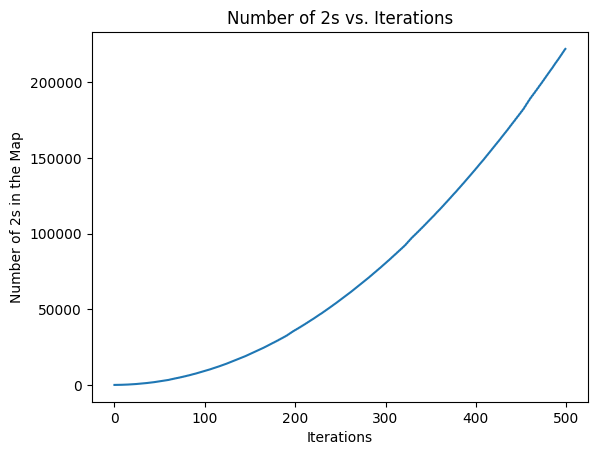

In [ ]:
import matplotlib.pyplot as plt

m = m_orig.copy()
m_tile = np.where(m_orig == 2, 0, m_orig)
count_of_twos = []

for _ in range(500):
    m = update_map(m)
    m = extend_map_with_tile(m, m_tile)
    count_of_twos.append(np.sum(m == 2))

# Plotting the results
plt.plot(count_of_twos)
plt.xlabel('Iterations')
plt.ylabel('Number of 2s in the Map')
plt.title('Number of 2s vs. Iterations')
plt.show()

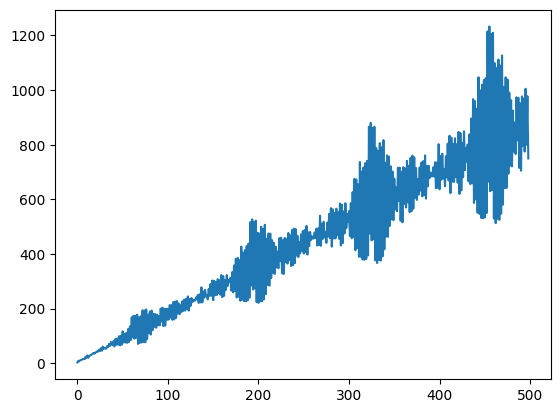

In [ ]:
# Calculating the differences in the count of '2's between consecutive iterations
differences = np.diff(count_of_twos[::])

# Plotting the differences
plt.plot(differences)
plt.show()

In [ ]:
np.diff(count_of_twos[170:350:])

array([266, 334, 260, 358, 265, 383, 241, 386, 244, 378, 229, 427, 233, 405, 228, 414, 227, 429, 230, 438, 240, 517, 285, 527, 270, 518, 274, 522, 224, 478, 221, 475, 227, 500, 227, 492, 234, 507, 253, 456, 287, 475, 284, 475, 312, 451, 330, 441, 327, 427, 351, 409, 348, 458, 374, 460, 329, 450, 327, 459, 371, 456, 365, 477, 378, 468, 356, 488, 359, 493, 366, 491, 394, 467, 389, 444, 403, 472, 412, 484, 402, 488, 407, 503, 398, 479, 429, 481, 451, 465, 457, 457, 479, 459, 493, 431, 494, 433, 540, 430, 511, 456, 518, 461, 480, 441, 515, 464, 547, 458, 568, 427, 564, 457, 550, 457, 566, 469, 553, 456, 585, 431, 581, 440, 556, 475, 586, 495, 546, 518, 557, 466, 586, 458, 627, 462, 675, 414, 673, 422, 655, 390, 737, 390, 702, 380, 717, 379, 733, 382, 741, 395, 866, 475, 880, 450, 862, 454, 866, 377, 788, 367, 778, 378, 806, 376, 791, 391, 817, 417, 734, 464, 761, 463, 757, 503, 721, 527, 702])

In [ ]:
np.diff(count_of_twos[193:195]), np.diff(count_of_twos[324:326])

(array([527]), array([880]))

In [ ]:
324-193

131

In [ ]:
differences = np.diff(count_of_twos[target_offset::131])
differences

array([30462, 60834, 91206])

In [ ]:
diff2 = np.diff(differences)
diff2

array([30372, 30372])

In [ ]:
cycle = 131
target = 26501365
target_idx = target-1
target_offset = target_idx%cycle
series_offset = 2
num_terms = (target_idx - target_offset)/cycle - series_offset

In [ ]:
a1 = differences[series_offset]
d = 30372
offset_total = count_of_twos[target_offset+cycle*series_offset]

In [ ]:
def sum_arithmetic_series(a1, d, n):
    """
    Parameters:
    a1 (int/float): The first term of the series.
    d (int/float): The common difference between terms.
    n (int): The number of terms in the series.
    """
    return n / 2 * (2 * a1 + (n - 1) * d)

sum_arithmetic_series(a1, d, num_terms)+offset_total

621494544278648.0